### 1. Packages 

First, let's run the cell below to import all the packages that you will need.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import parameter

### 2. Dataset

In [2]:
import tensorflow_datasets as tfds

(ds_train, ds_validation), ds_info = tfds.load(
    'imagenette',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


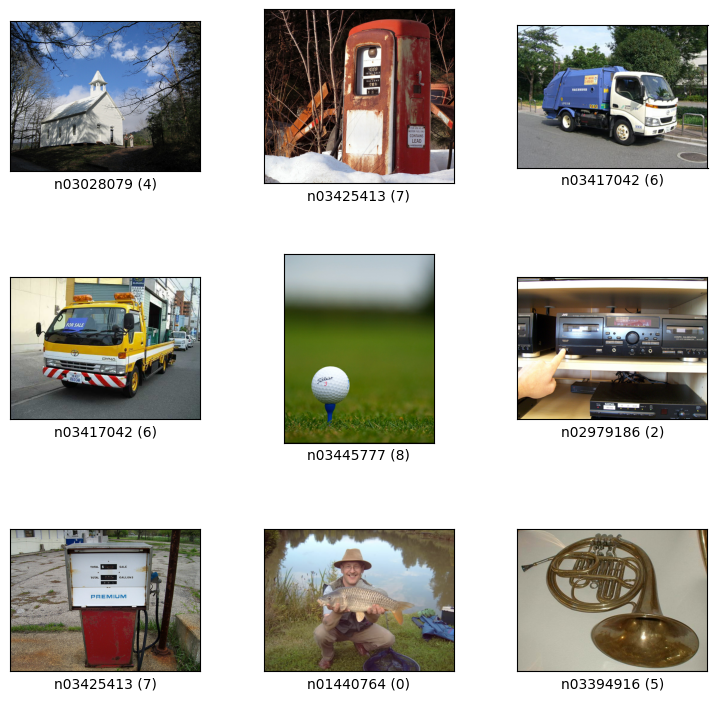

In [3]:
fig = tfds.show_examples(ds_train, ds_info)

In [4]:
def normalize_img(image, label):
    image = tf.image.resize(image, (parameter.IMAGE_SIZE, parameter.IMAGE_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(parameter.BATCH_SIZE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_validation = ds_validation.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_validation = ds_validation.batch(parameter.BATCH_SIZE)
ds_validation = ds_validation.prefetch(tf.data.experimental.AUTOTUNE)



### 3. Training

How to run

In [5]:
import tensorflow_datasets as tfds

import Models.CNN_Model
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

num_classes = 10

model = Models.CNN_Model.Model(num_classes)


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                      

In [6]:
# [layer1, layer2, layer3] = model.layers
# W1, b1 = layer1.get_weights()
# W2, b2 = layer2.get_weights()
# W3, b3 = layer3.get_weights()
# print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
# print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
# print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

In [8]:
history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=10,
    verbose=2,
)

Epoch 1/10


134/134 - 133s - loss: 1.3585 - accuracy: 0.5533 - val_loss: 1.8425 - val_accuracy: 0.4112 - 133s/epoch - 991ms/step
Epoch 2/10
134/134 - 127s - loss: 1.2949 - accuracy: 0.5685 - val_loss: 1.9070 - val_accuracy: 0.4107 - 127s/epoch - 945ms/step
Epoch 3/10
134/134 - 130s - loss: 1.2380 - accuracy: 0.5877 - val_loss: 1.6807 - val_accuracy: 0.4517 - 130s/epoch - 973ms/step
Epoch 4/10
134/134 - 129s - loss: 1.1724 - accuracy: 0.6130 - val_loss: 1.7715 - val_accuracy: 0.4502 - 129s/epoch - 966ms/step
Epoch 5/10
134/134 - 130s - loss: 1.1322 - accuracy: 0.6287 - val_loss: 1.5726 - val_accuracy: 0.4989 - 130s/epoch - 967ms/step
Epoch 6/10
134/134 - 128s - loss: 1.0940 - accuracy: 0.6372 - val_loss: 1.7534 - val_accuracy: 0.4647 - 128s/epoch - 958ms/step
Epoch 7/10
134/134 - 126s - loss: 1.0427 - accuracy: 0.6590 - val_loss: 1.7118 - val_accuracy: 0.4815 - 126s/epoch - 941ms/step
Epoch 8/10
134/134 - 141s - loss: 0.9970 - accuracy: 0.6757 - val_loss: 1.5874 - val_accuracy: 0.5068 - 141s/epoch 

### 4. Test

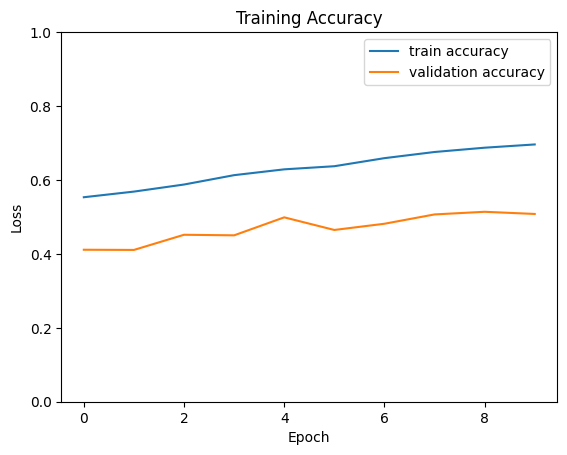

<Figure size 640x480 with 0 Axes>

In [14]:
plt.plot(history.history['accuracy'], label="train accuracy")
plt.plot(history.history['val_accuracy'], label="validation accuracy")
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend()
plt.show()
plt.savefig(fname='temp.svg')
#plt.close()